In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf 
import datetime  

In [3]:
start = '2012-01-01'
end = datetime.datetime.now().strftime('%Y-%m-%d')
stock = 'AAPL'
# Get the data
data = yf.download(stock, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.416983,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.483710,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.622310,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.754260,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.734029,394024400
...,...,...,...,...,...,...,...
3114,2024-05-20,189.330002,191.919998,189.009995,191.039993,191.039993,44361300
3115,2024-05-21,191.089996,192.729996,190.919998,192.350006,192.350006,42309400
3116,2024-05-22,192.270004,192.820007,190.270004,190.899994,190.899994,34648500
3117,2024-05-23,190.979996,191.000000,186.630005,186.880005,186.880005,51005900


In [5]:
ma_100_days = data['Close'].rolling(100).mean()


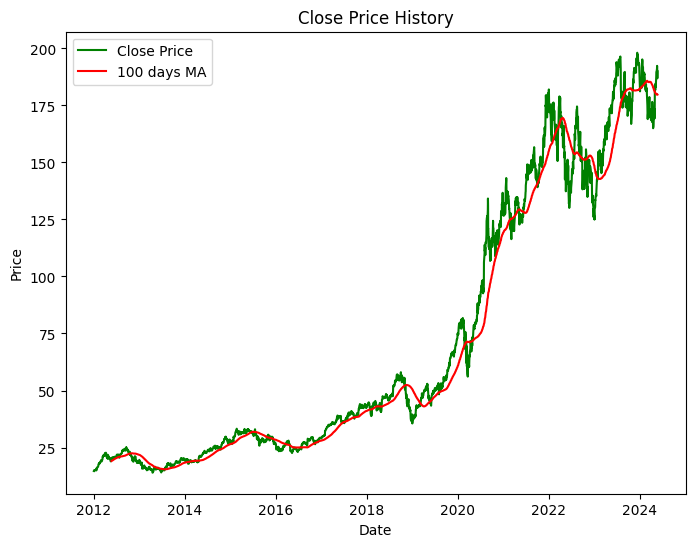

In [6]:
plt.figure(figsize=(8,6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='g')
plt.plot(data['Date'], ma_100_days, label='100 days MA', color='r')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')


In [7]:
ma_200_days = data['Close'].rolling(200).mean()

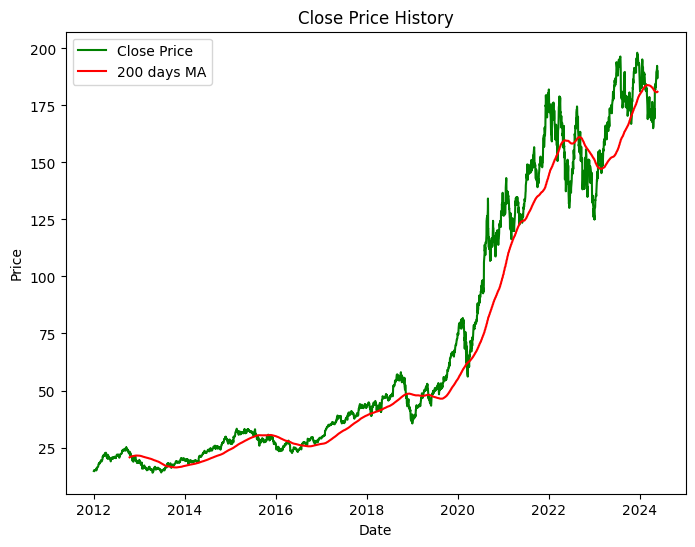

In [8]:
plt.figure(figsize=(8,6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='g')
plt.plot(data['Date'], ma_200_days, label='200 days MA', color='r')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')


In [9]:
data.dropna(inplace=True)

## Training...  ##

In [10]:
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.80)]) #80%
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)]) #20%

In [11]:
data_train.shape[0], data_test.shape[0]

(2495, 624)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [13]:
data_train_scale = scaler.fit_transform(data_train)

In [14]:
x_train = []
y_train = []
for i in range(100, data_train_scale.shape[0]):
    x_train.append(data_train_scale[i-100:i])
    y_train.append(data_train_scale[i,0])

In [15]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [16]:
from keras._tf_keras.keras.models import Sequential
from keras._tf_keras.keras.layers import Dense, LSTM, Dropout
from keras import backend


In [17]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=((x_train.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

C:\Users\jestebangil\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 153ms/step - loss: 0.0452
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 171ms/step - loss: 0.0041
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 172ms/step - loss: 0.0048
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 160ms/step - loss: 0.0036
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 161ms/step - loss: 0.0033
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 156ms/step - loss: 0.0036
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 177ms/step - loss: 0.0030
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 160ms/step - loss: 0.0030
Epoch 9/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 163ms/step - loss: 0.0028
Epoch 10/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 164ms/step - loss: 0.0026
Epoch 11/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 167ms/step - loss: 0.0024
Epoch 12/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 171ms/step - loss: 0.0031
Epoch 13/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 182ms/step - loss: 0.0023
Epoch 14/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 150ms/step - loss: 0.0021
Epoch 15/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 

In [1]:
model.save('stock_prediction.h5', save_format = 'h5')

NameError: name 'model' is not defined

In [21]:
data_test.head()

,Close
2495,164.770004
2496,163.759995
2497,161.839996
2498,165.320007
2499,171.179993


In [22]:
past_100_days = data_train.tail(100)

In [23]:
final_df = past_100_days._append(data_test, ignore_index=True)
final_df.head()

,Close
0,144.500000
1,145.639999
2,149.149994
3,148.479996
4,146.389999


In [24]:
input_data = scaler.fit_transform(final_df)
input_data
input_data.shape

(724, 1)

In [25]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [26]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape, y_test.shape)

(624, 100, 1) (624,)


## Making Predictions ##

In [27]:
y_predicted = model.predict(x_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step


In [28]:
y_predicted.shape

(624, 1)

In [29]:
y_test

array([5.43850123e-01, 5.30031410e-01, 5.03762453e-01, 5.51375133e-01,
       6.31550055e-01, 6.84909050e-01, 6.77794476e-01, 7.44698281e-01,
       6.93939063e-01, 6.74647729e-01, 7.42646100e-01, 6.46326383e-01,
       6.31002876e-01, 6.11985236e-01, 6.56314219e-01, 6.92570803e-01,
       7.01327122e-01, 7.56738298e-01, 7.42509149e-01, 7.43740666e-01,
       7.27596079e-01, 7.18976711e-01, 7.79723557e-01, 7.48118721e-01,
       6.82719918e-01, 6.42769200e-01, 6.45095074e-01, 6.45368768e-01,
       6.84909050e-01, 6.91065801e-01, 6.45368768e-01, 6.57408785e-01,
       6.12669366e-01, 5.63825378e-01, 5.40292731e-01, 5.11561157e-01,
       5.00752449e-01, 4.75578058e-01, 4.74346749e-01, 4.67916305e-01,
       6.19920683e-01, 6.80804480e-01, 6.78478605e-01, 6.95307114e-01,
       6.55082702e-01, 6.48105078e-01, 6.38117451e-01, 6.81488610e-01,
       7.01327122e-01, 6.44410944e-01, 5.96798473e-01, 6.00082171e-01,
       6.53577699e-01, 6.50294210e-01, 6.00082171e-01, 5.78464963e-01,
      

In [30]:
y_predicted

array([[0.44091842],
       [0.45807368],
       [0.47490984],
       [0.49029472],
       [0.504093  ],
       [0.5176389 ],
       [0.53268325],
       [0.5501435 ],
       [0.5707779 ],
       [0.59367317],
       [0.61673456],
       [0.6392977 ],
       [0.6587802 ],
       [0.67314535],
       [0.68132305],
       [0.6842625 ],
       [0.6842351 ],
       [0.68332833],
       [0.68394053],
       [0.6872643 ],
       [0.69348025],
       [0.70161426],
       [0.71023417],
       [0.7193676 ],
       [0.7283913 ],
       [0.7353258 ],
       [0.73816943],
       [0.73646426],
       [0.7307161 ],
       [0.72254753],
       [0.7137389 ],
       [0.70496   ],
       [0.6967561 ],
       [0.68877697],
       [0.68007183],
       [0.6697527 ],
       [0.65703535],
       [0.6418747 ],
       [0.62447375],
       [0.6054809 ],
       [0.58572614],
       [0.5680131 ],
       [0.555476  ],
       [0.5499611 ],
       [0.5525081 ],
       [0.562423  ],
       [0.57762516],
       [0.595

In [31]:
scaler.scale_

array([0.01368176])

In [32]:
scale_factor = 1/8.18605127e-04
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

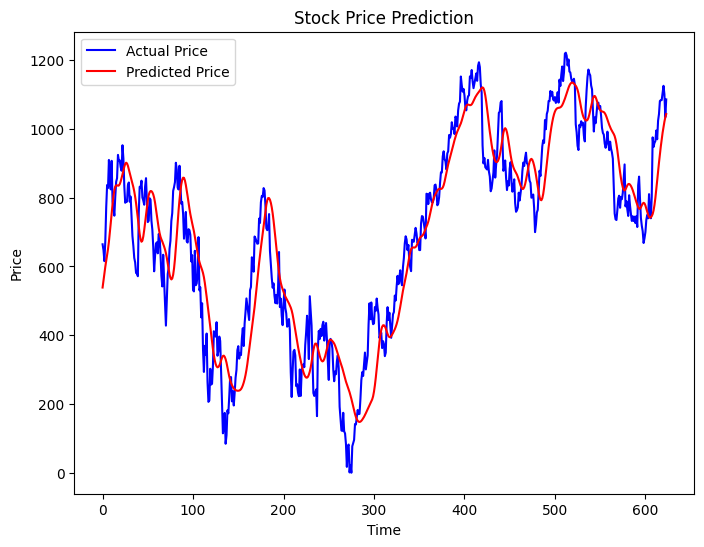

In [33]:
plt.figure(figsize=(8,6))
plt.plot(y_test, color='blue', label='Actual Price')
plt.plot(y_predicted, color='red', label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')